<img src='https://user-images.githubusercontent.com/6457691/89746244-a6e2a200-daf3-11ea-9314-7863d544d73c.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 1 / NOTE 3*

# 📝 Assignment

---

## 1. Concat 

세션시간에 다뤘던 6개의 데이터를 1개로 합치세요.

데이터를 불러오기 위하여 아래의 코드를 참조하세요.

합쳐진 데이터의 이름은 `df`입니다.

```python
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
df1 = pd.read_csv(urlhead + '000080.csv') 
# '000890.csv'
# '005300.csv'
# '027740.csv'
# '035810.csv'
# '136480.csv'
```



단, 모든 feature, 모든 데이터에 대해서가 아닌

- 매출액
- 자본총계
- EPS

- 제일 최근 분기의 데이터

에 대해서만 하면 됩니다.

||매출액|자본총계|EPS(원)|종목명|
|:-:|:-:|:-:|:-:|:-:|
|2020/09|6,243|10,897|453|하이트진로|
|...|...|...|...|...|
|2020/09|2,613|2,695|62|하림|

(첫부분은 값이 달라도 되며, 결과 shape는 6,4입니다.)

힌트 : 
- 데이터를 transpose
- column의 이름을 변경 및 설정
- 데이터의 일부 feature 선택
- `종목명`이라는 feature 지정
- 이후 `concat`으로 합치기
- 합친 이후의 index를 종목명으로 설정 및 drop

이라는 단계를 거치면 될겁니다.

In [110]:
import pandas as pd

urlhead = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/stocks/'
file_list = [ '000080.csv', '000890.csv', '005300.csv', '027740.csv', '035810.csv', '136480.csv' ]
def df(file_list):
  for i in file_list:
    if i == file_list[0]:
      df = pd.read_csv(urlhead + i, index_col=0).T.iloc[[-1],:]
    else:
      df_tmp = pd.read_csv(urlhead + i, index_col=0).T.iloc[[-1],:]
      df = pd.concat([df, df_tmp])
  return df

df = df(file_list)
# 데이터를 transpos
df

,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
2020/09\n(IFRS연결),"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
2020/09\n(IFRS연결),205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2020/09\n(IFRS연결),"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
2020/09\n(IFRS연결),521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
2020/06\n(IFRS연결),"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
2020/09\n(IFRS연결),"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


In [111]:
df = df.reset_index()
df = df.drop(df.columns[0], axis=1)
# column의 이름을 변경 및 설정
df

,매출액,영업이익,영업이익(발표기준),세전계속사업이익,당기순이익,당기순이익(지배),당기순이익(비지배),자산총계,부채총계,자본총계,자본총계(지배),자본총계(비지배),자본금,영업활동현금흐름,투자활동현금흐름,재무활동현금흐름,CAPEX,FCF,이자발생부채,영업이익률,순이익률,ROE(%),ROA(%),부채비율,자본유보율,EPS(원),PER(배),BPS(원),PBR(배),현금DPS(원),현금배당수익률,현금배당성향(%),발행주식수(보통주)
0,"6,243",644,644,465,322,323,0,"39,617","28,720","10,897","10,893",5,"3,688","-3,009",-410,-594,382,"-3,391","15,995",10.31,5.17,6.89,2.04,263.55,216.77,453,34.26,"15,609",2.32,NaN,NaN,NaN,"70,133,611"
1,205,6,6,5,4,4,NaN,"1,555",739,816,816,NaN,637,-42,-10,-34,18,-60,465,2.92,2.15,-17.61,-8.99,90.59,27.50,3,NaN,640,1.41,NaN,NaN,NaN,"127,449,373"
2,"5,980",293,293,194,155,147,7,"34,066","21,970","12,096","11,942",154,44,"1,284",-958,"1,009",315,969,"15,489",4.90,2.59,-7.07,-2.50,181.63,"43,300.25","1,682",NaN,"145,448",0.70,0,NaN,0.00,"7,993,460"
3,521,-89,-89,-104,-104,-104,0,"1,897","1,273",624,622,2,792,39,39,-85,3,36,839,-17.17,-19.95,-50.65,-21.41,204.06,-33.01,-61,NaN,368,2.37,0,NaN,0.00,"168,807,631"
4,"4,108",246,246,816,657,659,-1,"18,966","11,432","7,534","4,351","3,183",282,-33,-103,"1,051",82,-115,"8,639",5.98,16.00,17.65,2.18,151.74,"1,538.72","1,168",3.98,"7,821",0.64,NaN,NaN,0.00,"55,640,623"
5,"2,613",1,1,17,66,66,0,"8,550","5,855","2,695","2,689",6,531,150,-233,-257,127,23,"5,016",0.06,2.51,0.69,0.20,217.22,473.10,62,141.13,"2,532",1.01,NaN,NaN,NaN,"106,209,702"


In [112]:
df2 = pd.DataFrame(
    {'종목' : ['000080', '000890', '005300', '027740', '035810', '136480', '136490'],
     '종목명': ['하이트진로', '보해양조', '롯데칠성', '마니커', '이지홀딩스', '하림', '선진'], 
     '테마' : ['주류', '주류', '주류', '육계', '육계', '육계', '돼지고기']}
)

df2

,종목,종목명,테마
0,000080,하이트진로,주류
1,000890,보해양조,주류
2,005300,롯데칠성,주류
3,027740,마니커,육계
4,035810,이지홀딩스,육계
5,136480,하림,육계
6,136490,선진,돼지고기


In [113]:
df = pd.concat([df2, df], axis = 1)
# df

In [114]:
df = df.drop(6)
df1 = df
# df

In [115]:
df = df[['종목명', '매출액', '자산총계', 'EPS(원)']]
# df.shape

In [116]:
df = df[['종목명', '매출액', '자산총계', 'EPS(원)']].set_index('종목명')
df

,매출액,자산총계,EPS(원)
종목명,,,
하이트진로,"6,243","39,617",453
보해양조,205,"1,555",3
롯데칠성,"5,980","34,066","1,682"
마니커,521,"1,897",-61
이지홀딩스,"4,108","18,966","1,168"
하림,"2,613","8,550",62


In [117]:
# 문자열 숫자로 전환
def tofloat(string):
  return float(string.replace(',', ''))

for i in ['매출액', '자산총계', 'EPS(원)']:
  df[i] = df[i].apply(tofloat)

## 2. Reshape 

방금 만든 데이터를 아래 예시와 같은 **tidy** 형태로 만드세요.

이때 tidy 데이터의 이름은 `df_tidy` 입니다.

|종목명|Feature|Value|
|:-:|:-:|:-:|
|하이트진로|매출액|6243|
|보해양조|매출액|205|
|롯데칠성|매출액|5980|
|...|...|...|
|마니커|EPS(원)|-61|
|이지홀딩스|EPS(원)|1168|
|하림|EPS(원)|62|

이 후 아래의 코드를 정상적으로 실행했을때 나오는 box의 수를 `res`에 저장하세요.

```python
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');
```




In [118]:
# ... 내부에 자본총계 대신 자산총계로 대체 하였습니다.

df_tidy = df.reset_index()
df_tidy = df_tidy.melt(id_vars = '종목명', value_vars= ['매출액', '자산총계', 'EPS(원)'])
df_tidy

,종목명,variable,value
0,하이트진로,매출액,6243.0
1,보해양조,매출액,205.0
2,롯데칠성,매출액,5980.0
3,마니커,매출액,521.0
4,이지홀딩스,매출액,4108.0
5,하림,매출액,2613.0
6,하이트진로,자산총계,39617.0
7,보해양조,자산총계,1555.0
8,롯데칠성,자산총계,34066.0
9,마니커,자산총계,1897.0


In [53]:
# df_tidy.dtypes

In [12]:
# 실행후 런타임 재시작 하고 다시 실행 해야 에러가 안뜸.

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rc('font', family='NanumBarunGothic') 
plt.clf()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

<Figure size 432x288 with 0 Axes>

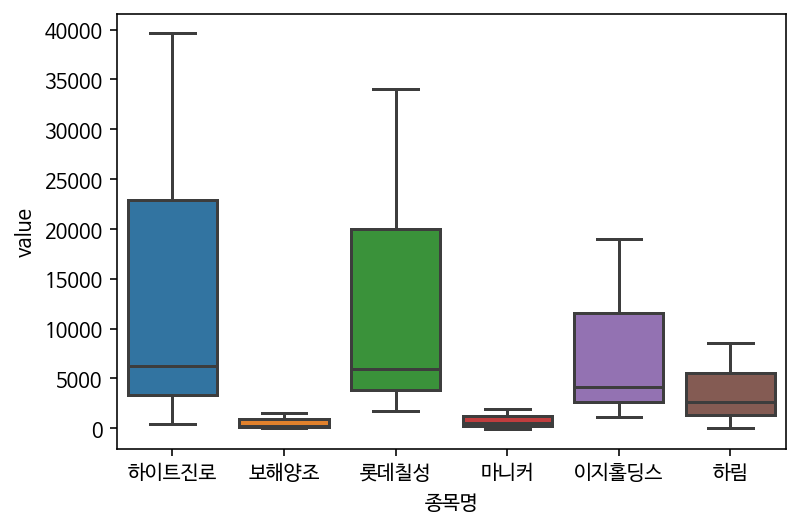

In [119]:
sns.boxplot(data = df_tidy, x = '종목명', y = 'value');

In [120]:
# res 를 표시되는 박스의 수로 지정
res = 6

## 3. Merge & Join +

pandas merge의 options중 how 에는 여러가지 옵션들이 있습니다.

공식 레퍼런스를 검색, 참조하여

아래 코드를 바탕으로 

다음과 같은 결과물을 만드는 코드를 작성하세요

변수의 이름은 `df2` 입니다.

|key1|key2|A|B|C|D|
|:-:|:-:|:-:|:-:|:-:|:-:|
|K0|K0|A0|B0|C0|D0|
|K0|K1|A1|B1|NaN|NaN|
|K1|K0|A2|B2|C1|D1|
|K1|K0|A2|B2|C2|D2|
|K2|K1|A3|B3|NaN|NaN|





In [121]:
import pandas as pd

left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

df2 = left.merge(right, how = 'outer', on = ['key1', 'key2'])
df2 = df2.drop(5)

## Grading

이전 과제를 완료했다면, 아래의 코드를 실행하세요. 

In [126]:
import numpy as np

def grade(df, df2, df_tidy, res):
  score = 0
  score += (df['매출액'][2] == 5980)
  score += (df['자산총계'][3] == 1897)   
  score += (df2.equals(pd.DataFrame({
    'key1' : ['K0', 'K0', 'K1', 'K1', 'K2'],
    'key2' : ['K0', 'K1', 'K0', 'K0', 'K1'],
    'A' : ['A0', 'A1', 'A2', 'A2', 'A3'],
    'B' : ['B0', 'B1', 'B2', 'B2', 'B3'],
    'C' : ['C0', np.NaN, 'C1', 'C2', np.NaN],
    'D' : ['D0', np.NaN, 'D1', 'D2', np.NaN],
  }))) 
  score += (res == 6)
  # 에러 메세지 때문에 'Value' -> 'value'로 수정 했습니다.
  score += (round(df_tidy['value'].mean(), 3) == 7090.444)
  return(score)

In [127]:
grade(df, df2, df_tidy, res)

5

In [128]:
df['매출액'][2]

5980.0

In [129]:
df['자산총계'][3]

1897.0

In [130]:
res

6

In [131]:
int(df_tidy['value'].mean())

7090

## 🔥 도전과제

아래 링크들을 참조하여, 
특정 테마별로 포함되어 있는 종목의 데이터를 직접 csv형태로 수집하고 (아래 적힌 3개씩)

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=408>

<https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=36>

- 최종 분기에 해당하는 데이터

- 테마별 평균 데이터를 결과물로 만드는 코드를 작성하세요.

단, 모든 feature에 대해서가 아닌

- 매출액
- 자본총계
- EPS

에 대해서만 하면 됩니다.

|종목명|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|대한해운|...|...|...|...|
|팬오션|...|...|...|...|
|KSS해운|...|...|...|...|
|세미콘라이트|...|...|...|...|
|오성첨단소재|...|...|...|...|
|에이아이비트|...|...|...|...|

---

|테마|매출액|자본총계|EPS|
|:-:|:-:|:-:|:-:|
|해운|...|...|...|
|마리화나(대마)|...|...|...|

이후 아래의 예시 처럼 seaborn을 사용하여 결과를 barplot으로 시각화하세요.

단, 한글이 깨지는 에러를 여러분이 직접 고쳐야합니다.

In [146]:
import pandas as pd

# 자본총계 = 자산총계 - 부채총계
marihana = '종목명	현재가	전일비	등락률	매출액	자산총계	부채총계	주당순이익	토론실  한국비엔씨	7,750	상승 320	+4.31%	194	676	306	28	토론실  우리바이오	5,670	상승 200	+3.66%	16,234	6,461	5,010	375	토론실  오성첨단소재	4,020	상승 15	+0.37%	796	2,572	628	162	토론실  에이아이비트	543	0	0.00%	292	581	129	-221	토론실  뉴프라이드	717	0	0.00%	398	1,152	807	-1,423	토론실  마이더스AI	522	하락 4	-0.76%	82	454	70	-209	토론실  에스엘바이오닉스 /1,130	하락 20	-1.74%	286	648	178	-8	토론실'
shipping = '종목명	현재가	전일비	등락률	매출액	자산총계	부채총계	주당순이익	토론실  HMM/ 44,200	상승 1,600	+3.76%	64,133	93,734	76,848	384	토론실  흥아해운	258	0	0.00%	889	3,001	3,119	-313	토론실  팬오션	7,390	하락 50	-0.67%	24,972	46,593	18,527	173	토론실  대한해운	3,535	하락 25	-0.70%	8,841	33,456	24,923	34	토론실  KSS해운	12,600	하락 200	-1.56%	2,262	10,695	8,007	566	토론실'
marihana = marihana.replace('\t', '/')
shipping = shipping.replace('\t', '/')
print(marihana)
def stock(option):
  stock = option.split('/')
  stock = [stock[i:i+8] for i in range(0, len(stock), 8)]
  stock = pd.DataFrame(stock)
  stock[0] = stock[0].str.replace('토론실', '')
  stock = stock.drop(len(stock)-1)
  stock = stock[[0, 4, 5, 7]]
  return stock

marihana = stock(marihana)
marihana.to_csv('marihana.csv')
shipping = stock(shipping)
shipping.to_csv('shipping.csv')

종목명/현재가/전일비/등락률/매출액/자산총계/부채총계/주당순이익/토론실  한국비엔씨/7,750/상승 320/+4.31%/194/676/306/28/토론실  우리바이오/5,670/상승 200/+3.66%/16,234/6,461/5,010/375/토론실  오성첨단소재/4,020/상승 15/+0.37%/796/2,572/628/162/토론실  에이아이비트/543/0/0.00%/292/581/129/-221/토론실  뉴프라이드/717/0/0.00%/398/1,152/807/-1,423/토론실  마이더스AI/522/하락 4/-0.76%/82/454/70/-209/토론실  에스엘바이오닉스 /1,130/하락 20/-1.74%/286/648/178/-8/토론실


In [162]:
mari_index = [i for i in marihana.iloc[0,:]]
shipping_index = [i for i in shipping.iloc[0,:]]

df_mari = pd.read_csv('marihana.csv', names = mari_index)[1:]
df_shipping = pd.read_csv('shipping.csv', names = shipping_index)[1:]
df_mari['테마'] = ['대마' for _ in range(len(df_mari))]
df_shipping['테마'] = ['해운' for _ in range(len(df_shipping))]

In [163]:
df_challenge = pd.concat([df_mari, df_shipping])
index = ['매출액', '자산총계', '주당순이익']
def tofloat(string):
  return float(string)

for i in index:
  df_challenge[i] = df_challenge[i].str.replace(',', '').apply(tofloat)
df_challenge['EPS'] = df_challenge['주당순이익']
df_challenge.drop(['주당순이익'], axis = 1, inplace=True)

In [164]:
df_challenge

,종목명,매출액,자산총계,테마,EPS
1.0,한국비엔씨,194.0,676.0,대마,28.0
2.0,우리바이오,16234.0,6461.0,대마,375.0
3.0,오성첨단소재,796.0,2572.0,대마,162.0
4.0,에이아이비트,292.0,581.0,대마,-221.0
5.0,뉴프라이드,398.0,1152.0,대마,-1423.0
6.0,마이더스AI,82.0,454.0,대마,-209.0
7.0,에스엘바이오닉스,286.0,648.0,대마,-8.0
1.0,HMM,64133.0,93734.0,해운,384.0
2.0,흥아해운,889.0,3001.0,해운,-313.0
3.0,팬오션,24972.0,46593.0,해운,173.0


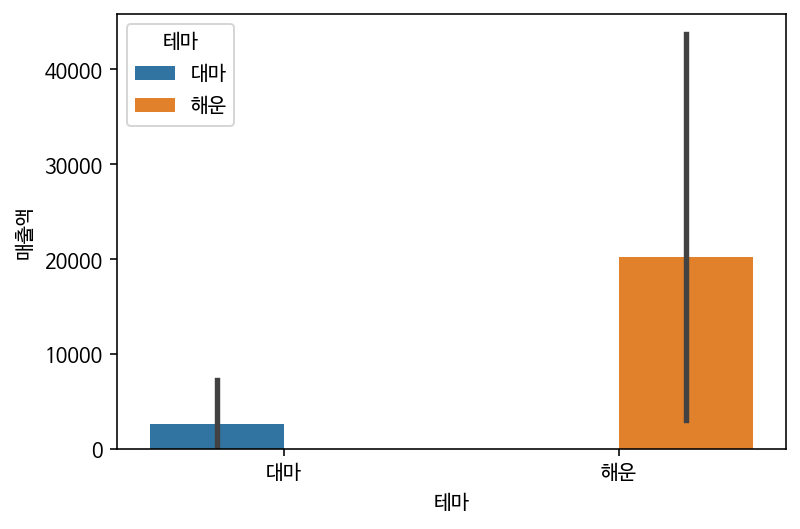

In [165]:
sns.barplot(data = df_challenge, x = '테마', y = '매출액', hue = '테마');

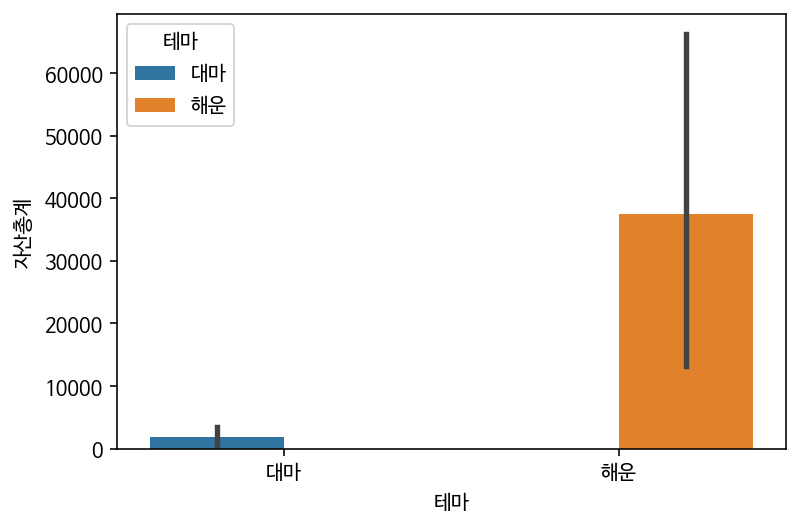

In [166]:
sns.barplot(data = df_challenge, x = '테마', y = '자산총계', hue = '테마');

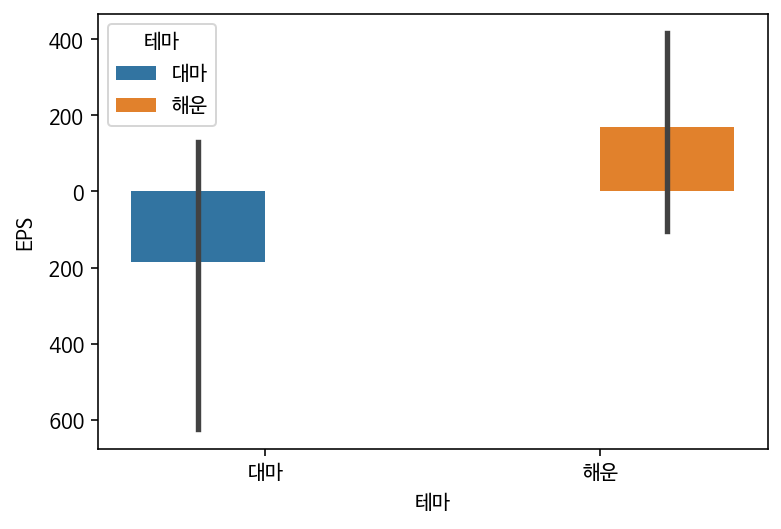

In [167]:
sns.barplot(data = df_challenge, x = '테마', y = 'EPS', hue = '테마');

In [170]:
df_challenge_melt = df_challenge.melt(id_vars="테마", value_vars=["매출액", "자산총계", "EPS"])
df_challenge_melt = df_challenge_melt.rename(columns={"variable":"Feature", "value":"Value"})
df_challenge_melt

,테마,Feature,Value
0,대마,매출액,194.0
1,대마,매출액,16234.0
2,대마,매출액,796.0
3,대마,매출액,292.0
4,대마,매출액,398.0
5,대마,매출액,82.0
6,대마,매출액,286.0
7,해운,매출액,64133.0
8,해운,매출액,889.0
9,해운,매출액,24972.0


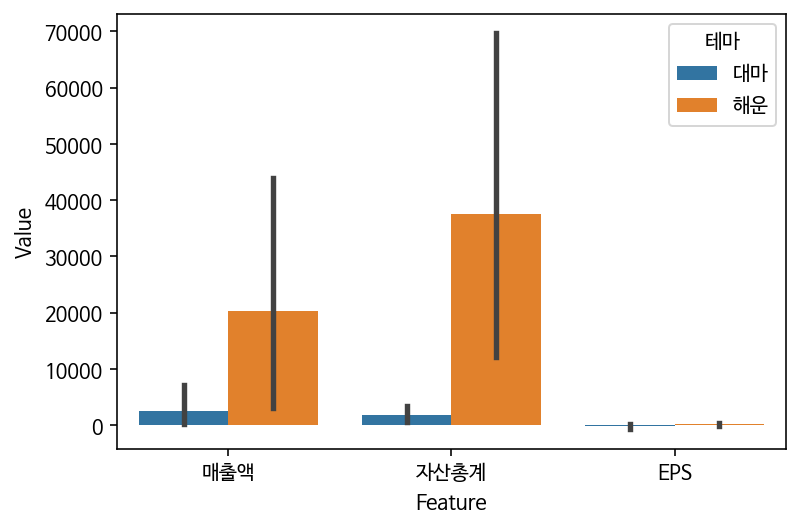

In [172]:
sns.barplot(data = df_challenge_melt, x = "Feature", y = "Value", hue="테마");